# Constrain dark matter fraction that planetary-mass PBHs could compose

This tutorial walks the user through computing constraints on the fraction of dark matter that planetary-mass PBHs could compose using upper limits for transient continuous wave searches in O4a data.

The user may input their own mass function or suppression factor and use the model-independent rate densities to calculate constraints on their own PBH models.

## Getting Started

Before running this tutorial, ensure you have the `cw_constrain` package installed and properly set up. See the `README.md` for installation instructions.

Or, run in google collab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrew-l-miller/cw_constrain/blob/main/tutorials/O4a_pbh_all_sky_tutorial.ipynb)

In [1]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False
    
if IN_COLAB:
    !pip install cw-constrain


## Import necessary packages

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os
import sys
import cw_constrain
from cw_constrain.PBH_constrain.pbh_constrain import *

## Load upper limits on equal-mass and asymmetric mass-ratio systems

In [25]:
filepath_equal = "../../limits/O4a_light_PBH_limits_equal.txt"
data_equal = np.loadtxt(filepath_equal)
mc, dmax95_equal, R95_equal = data_equal.T

In [26]:
filepath_asymm = "../../limits/O4a_light_PBH_limits_asymm.txt"
data_asymm = np.loadtxt(filepath_asymm)

# Unpack the columns into variables
m1s, m2s, dmax95_asymm, R95_asymm = data_asymm.T

## How to compute the upper limit on $\tilde{f}$

We have considered the prescriptions in Raidal et al. (2018) arXiv:1812.01930 and Hutsi et al. (2021) arXiv:2012.02786 , re-presented in Miller et al. (2022) arXiv:2110.06188, in which

\begin{equation}
\mathcal{R} = 5.28 \times 10^{-7}\, \mathrm{kpc}^{-3} \mathrm{yr}^{-1} \left(\frac{m_1}{M_\odot}\right)^{-32/37} \left(\frac{m_2}{m_1}\right)^{-34/37} \tilde{f}^{53/37}
\end{equation}

where 

\begin{equation}
\tilde f^{53/37} \equiv f_{\rm sup} f(m_1) f(m_2) f_{\rm PBH}^{53/37}
\end{equation}

Here, $f_{\rm sup}$ is the suppression factor that tells us to what extent binaries in the early universe were broken apart by nearby objects, $f(m)$ are the mass functions for $m_1$ and $m_2$, and $f_{\rm PBH}$ is the infamous fraction of dark matter that PBHs could compose. 

The mass functions are normalized such that $\int f(m) {\rm d} \ln m = 1$. $f_{\rm sup}=1$ for zero rate suppression (and gives the strongest constraint on $f_{\rm PBH}$.)

The model-independent output of continuous-wave searches is $\mathcal{R}_{95\%}$. We equate $\mathcal{R}_{95\%}=\mathcal{R}$ and solve for $\tilde{f}$ as a function of $m_1$,$m_2$.


## Compute constraint on $\tilde{f}$ and plot for equal- and asymmetric mass-ratio cases

In [27]:
Mtot = 2**(1/5) * mc
ftilde_equal = calc_ftilde_equal_mass(R95_equal,Mtot)

ftilde_asymm = calc_ftilde_asymm_mass(R95_asymm,m1s,m2s)


### Plotting constraints on $\tilde{f}$ for equal-mass systems

To plot the color axis, we assume that the $f(m_1)=f(m_2)=1$ and $f_{\rm sup}=1$, so that $\tilde{f}=f_{\rm PBH}$

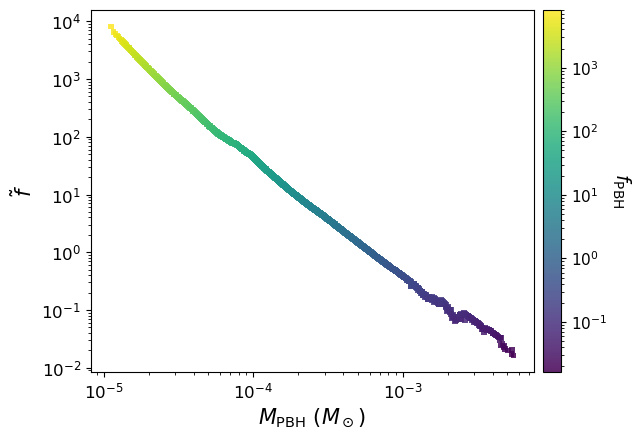

In [28]:
fig, ax = plt.subplots(figsize=(6.5, 4.5))
# Plot
sc = ax.scatter(
    0.5*Mtot.transpose(),
    ftilde_equal.transpose(),
    c=ftilde_equal.transpose(),
    cmap='viridis',                      # brighter and smoother than viridis
    marker='s',
    s=16,                               # slightly larger dots
    alpha=0.85,
    edgecolor='none',
    norm=mpl.colors.LogNorm()
)

# Axes scales and labels
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$M_{\rm PBH}$ $(M_\odot)$', fontsize=15)
ax.set_ylabel(r'$\tilde{f}$', fontsize=15)

# Ticks and style
ax.tick_params(axis='both', which='major', labelsize=12)
# ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Colorbar
cb = fig.colorbar(sc, ax=ax, pad=0.02, fraction=0.05)
cb.set_label(r'$f_{\rm PBH}$', size=14, rotation=270, labelpad=18)
cb.ax.tick_params(labelsize=11)

# Layout and save
plt.tight_layout()

### Plotting constraints on $\tilde{f}$ for asymmetric-mass-ratio systems

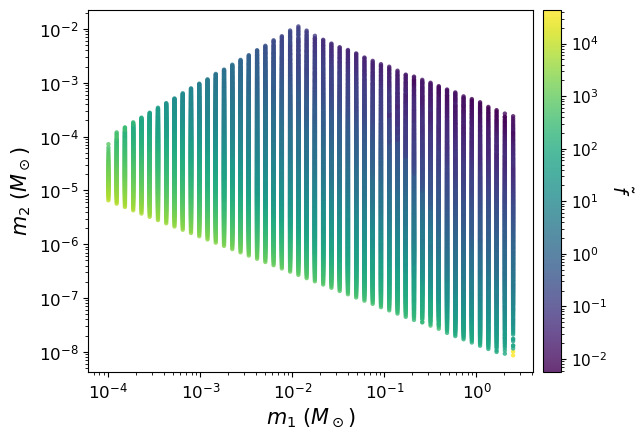

In [29]:
fig, ax = plt.subplots(figsize=(6.5, 4.5))

sc = ax.scatter(
    m1s,
    m2s,
    c=ftilde_asymm,
    cmap='viridis',
    marker='o',
    s=10,                                 # Bigger for better visibility
    alpha=0.8,
    edgecolor='none',
    norm=mpl.colors.LogNorm()
)

# Axis formatting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_1$ $(M_\odot)$', fontsize=15)
ax.set_ylabel(r'$m_2$ $(M_\odot)$', fontsize=15)

# Ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Grid
# ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Colorbar
cb = fig.colorbar(sc, ax=ax, pad=0.02, fraction=0.05)
cb.set_label(r'$\tilde{f}$', size=14, rotation=270, labelpad=18)
cb.ax.tick_params(labelsize=11)

# Layout
plt.tight_layout()

# Use the rate density upper limits to constrain your own PBH function

The above code outputs a PBH-model-independent rate density $=\mathcal{R}_{95\%}$, which can be used directly to constrain any PBH model that relates a rate density to $f_{\rm PBH}$. Basically

\begin{equation}
\mathcal{R}_{95\%} = \mathcal{R}\propto f_{\rm sup}f(m_1)f(m_2)f_{\rm PBH}F(m_1,m_2)
\end{equation}

Thus, you can code up your own expression for $\mathcal{R}$, or, if you wish to use the prescriptions given above and change the mass functions for $m_1$ $m_2$, or the suppression factor $f_{\rm sup}$, you can directly use $\tilde{f}$. Two values are output for $\tilde{f}$ from the code: one assuming equal-mass objects, and one for asymmetric mass-ratio objects

In [32]:
def constrain_your_fpbh(rate_density, fm1, fm2,fsup):
    """
    User-implemented function to map your rate density to the effective parameter f_PBH.

    Parameters
    ----------
    rate_density : float or array-like
        The merger rate density [e.g., in kpc⁻³ yr⁻¹].

    fm1 : float
        The fraction of PBHs in the first mass bin (or mass distribution parameter).

    fm2 : float
        The fraction of PBHs in the second mass bin (or other relevant mass distribution parameter).
    
    fsup : float
        Suppression of binary formation parameter.

    Returns
    -------
    fpbh : float
        The effective PBH fraction corresponding to the given merger rate density and mass fractions.

    Notes
    -----
    You must define this function based on how your physical model links the observed or predicted 
    rate density to f_PBH. This varies depending on your assumptions (e.g., clustering, binaries 
    formed in the early universe, mass function, etc.).
    """
    raise NotImplementedError("You must implement this function based on your PBH model.")


In [26]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
